In [ ]:
#import statements
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.layers import Dropout
from keras import regularizers
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
#exoplanet data link
exoPath = "cumulative.csv"

In [ ]:
#reading csv file
exoplanetRawData = pd.read_csv(exoPath)
exoplanetRawData

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560,10031643,K07984.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,-0.015700,0.765,0.023,-0.541,4.80600,0.63400,-0.63400,87.7,13.0,-13.0,1.11,0.32,-0.23,929.0,NaN,NaN,176.40,152.77,-77.60,8.4,1.0,q1_q17_dr25_tce,5638.0,169.0,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,9561,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,1.252,0.051,-0.049,3.22210,0.01740,-0.01740,1579.2,4.6,-4.6,29.35,7.70,-2.57,2088.0,NaN,NaN,4500.53,3406.38,-1175.26,453.3,1.0,q1_q17_dr25_tce,5638.0,139.0,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9561,9562,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,0.043,0.423,-0.043,3.11400,0.22900,-0.22900,48.5,5.4,-5.4,0.72,0.24,-0.08,1608.0,NaN,NaN,1585.81,1537.86,-502.22,10.6,1.0,q1_q17_dr25_tce,6119.0,165.0,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9562,9563,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,0,0.681402,2.434000e-06,-2.434000e-06,132.181750,0.002850,-0.002850,0.147,0.309,-0.147,0.86500,0.16200,-0.16200,103.6,14.7,-14.7,1.07,0.36,-0.11,2218.0,NaN,NaN,5713.41,5675.74,-1836.94,12

In [ ]:
#Cleaning Data


exoplanetValues = exoplanetRawData.values

#Converting to Pandas dataframe
exoPlanetDataFrame = pd.DataFrame(data=exoplanetValues)

#Checking and removing candidates
#Keep this out b/c only false positive candidates???
#exoPlanetDataFrame  = exoPlanetDataFrame[exoPlanetDataFrame[5] != "CANDIDATE"]



#custom test data transformations

exoPlanetDataFrame = exoPlanetDataFrame.drop(columns=12)
exoPlanetDataFrame = exoPlanetDataFrame.drop(columns=13)
exoPlanetDataFrame = exoPlanetDataFrame.drop(columns=34)
exoPlanetDataFrame = exoPlanetDataFrame.drop(columns=35)


#remove NaN values
exoPlanetDataFrame = exoPlanetDataFrame.dropna(axis='columns')

exoPlanetDataFrame

,0,1,2,4,5,7,8,9,10,11,14,20,47,48
0,1,10797460,K00752.01,CONFIRMED,CANDIDATE,0,0,0,0,9.48804,170.539,2.9575,291.934,48.1417
1,2,10797460,K00752.02,CONFIRMED,CANDIDATE,0,0,0,0,54.4184,162.514,4.507,291.934,48.1417
2,3,10811496,K00753.01,FALSE POSITIVE,FALSE POSITIVE,0,1,0,0,19.8991,175.85,1.7822,297.005,48.1341
3,4,10848459,K00754.01,FALSE POSITIVE,FALSE POSITIVE,0,1,0,0,1.73695,170.308,2.40641,285.535,48.2852
4,5,10854555,K00755.01,CONFIRMED,CANDIDATE,0,0,0,0,2.52559,171.596,1.6545,288.755,48.2262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560,10031643,K07984.01,FALSE POSITIVE,FALSE POSITIVE,0,0,0,1,8.58987,132.016,4.806,298.749,46.9734
9560,9561,10090151,K07985.01,FALSE POSITIVE,FALSE POSITIVE,0,1,1,0,0.527699,131.705,3.2221,297.189,47.0938
9561,9562,10128825,K07986.01,CANDIDATE,CANDIDATE,0,0,0,0,1.73985,133.001,3.114,286.509,47.1632
9562,9563,10147276,K07987.01,FALSE POSITIVE,FALSE POSITIVE,0,0,1,0,0.681402,132.182,0.865,294.165,47.1763


In [ ]:
#Splitting into training and testing data

x_values = exoPlanetDataFrame.filter([11, 14, 20, 47, 48], axis=1)
y_values = exoPlanetDataFrame.filter([4])

#Scaling the data to make training easier
x_values.values

#Changing y strings to  # values
y_values.replace({"CONFIRMED": 0, "CANDIDATE": 1, "FALSE POSITIVE": 2}, inplace=True)

y_values


,4
0,0
1,0
2,2
3,2
4,0
...,...
9559,2
9560,2
9561,1
9562,2


In [ ]:
#Splitting the data into testing and training/validation

X_train, X_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.30)
print(y_train.shape)
X_train.astype(float)

(6694, 1)


,11,14,20,47,48
5211,142.545000,202.880000,8.75000,286.45270,42.657879
9174,13.909354,142.876900,6.76500,297.94476,42.191879
2601,3.568100,169.742780,3.21310,297.01883,50.408981
1433,4.887531,132.707830,2.03400,291.71146,42.341499
6609,0.812592,131.556420,1.56460,288.49567,42.695560
...,...,...,...,...,...
835,7.981187,133.802114,1.80710,293.70905,45.286388
7271,13.032730,133.677800,3.90200,287.53177,44.308010
7860,14.797219,144.695961,7.61037,292.02866,42.669552
6710,22.571973,145.034499,4.00349,291.59738,44.398521


In [ ]:


#Converting Y values to categorical variables - That way we can use classification algorithims
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train.shape)

#converting  values to np array of type float
X_train = np.array(X_train, dtype=np.float)
X_test = np.array(X_test, dtype=np.float)
Y_train = np.array(y_train, dtype=np.float)
Y_test = np.array(y_test, dtype=np.float)


print(X_train.shape)
print(y_train.shape)

(6694, 3)
(6694, 5)
(6694, 3)


In [ ]:
#Building the model
model = Sequential()
model.add(Dense(15, activation='relu', input_dim=5))
model.add(Dense(40, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# train the model
hist = model.fit(X_train, y_train, epochs=175)

Epoch 1/175
210/210 [==============================] - 1s 2ms/step - loss: 0.8965 - accuracy: 0.4271
Epoch 2/175
210/210 [==============================] - 0s 2ms/step - loss: 0.6524 - accuracy: 0.4901
Epoch 3/175
210/210 [==============================] - 0s 2ms/step - loss: 0.6172 - accuracy: 0.5235
Epoch 4/175
210/210 [==============================] - 0s 2ms/step - loss: 0.5988 - accuracy: 0.5263
Epoch 5/175
210/210 [==============================] - 0s 2ms/step - loss: 0.6135 - accuracy: 0.5199
Epoch 6/175
210/210 [==============================] - 0s 2ms/step - loss: 0.6016 - accuracy: 0.5282
Epoch 7/175
210/210 [==============================] - 0s 2ms/step - loss: 0.5969 - accuracy: 0.5246
Epoch 8/175
210/210 [==============================] - 0s 2ms/step - loss: 0.5809 - accuracy: 0.5399
Epoch 9/175
210/210 [==============================] - 0s 2ms/step - loss: 0.5869 - accuracy: 0.5318
Epoch 10/175
210/210 [==============================] - 0s 2ms/step - loss: 0.5793 - accura

In [ ]:
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))

pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))

Accuracy on training data: 0.5985957384109497% 
 Error on training data: 0.4014042615890503
Accuracy on test data: 0.6083623766899109% 
 Error on test data: 0.3916376233100891


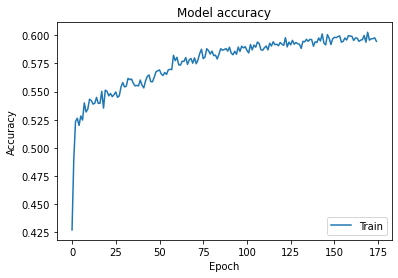

In [ ]:
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()